In [1]:
import numpy as np
import torch

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

In [2]:
def partial_derivative(order,weights,w_index,sample_size,x,y,mini_batch):
  sum=0
  for i in range(0,sample_size):
    x_i=torch.full(weights.size(),x[mini_batch[i]])
    ind=torch.arange(order)
    x_i=torch.pow(x_i,ind)
    sum+=((torch.sum(weights*x_i)-y[mini_batch[i]]))*x_i[w_index]
  return sum*(2/sample_size)


In [3]:
def cross_entropy(order,weights,sample_size,x,y,mini_batch):
  sum=0
  for i in range(0,sample_size):
    x_i=torch.full(weights.size(),x[mini_batch[i]])
    ind=torch.arange(order)
    x_i=torch.pow(x_i,ind)
    sum+=((torch.sum(weights*x_i)-y[mini_batch[i]]) ** 2)
  return sum/sample_size


In [4]:
def polynomial(w,x):
  return sum(w[j] * (x ** j) for j in range(w.size(dim=0)))

In [5]:
#Sample Size
m = 200

x_train, y_train = np.array(create_toy_data(sinusoidal,m,0.25))
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x_test = torch.linspace(0,1,100)
y_test = sinusoidal(x_test)
#print(x_train)
#print(y_train)

#Order
M = 9
W = torch.rand(M)

#Mini-Batch
batch_size = 30
miniB = torch.randint(m, (batch_size,))

#Learning Rate
n = 0.1

#Epochs
epoch = 1000

/tmp/ipykernel_872/1198250629.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.sin(2 * np.pi * x)


In [6]:
loss = []
for i in range(0,epoch):
  loss.append(cross_entropy(M,W,batch_size,x_train,y_train,miniB))
  #W = partial_derivative(M,W,n,batch_size,x_train,y_train,miniB)
  w_temp = torch.zeros(M)
  for j in range(0,M):
    w_temp[j] = W[j] - (n * partial_derivative(M,W,j,batch_size,x_train,y_train,miniB))
  W = w_temp

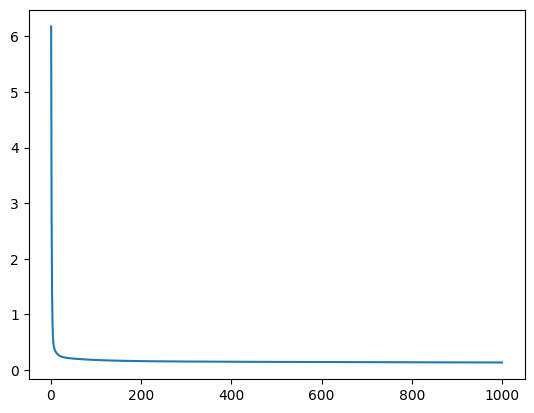

In [7]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, epoch + 1)), loss)

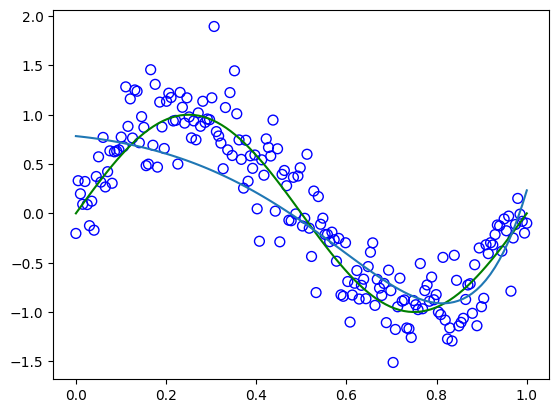

In [8]:
plt.scatter(x_train,y_train,facecolor="none",edgecolor="b",s=50,label="training data")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.plot(x_test, polynomial(W,x_test))